In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import datetime
from dateutil.parser import parse
import matplotlib
import matplotlib.pyplot as plt
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import MONDAY
# from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

def getPandasFromFile(path, fileName, theSkipRow):
    path = os.path.join(path , fileName)
    return pd.read_csv(path, skiprows= theSkipRow , header=0)


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
airport = pd.read_csv("./airport_full.csv")
harvard = pd.read_csv("./harvard_full.csv")

##### PREPROCESS

In [10]:
X_full = airport
X_full = X_full.drop(X_full.columns[[0]], axis=1)
X = airport[:4044]
X = X.drop(X.columns[[0]], axis=1)
y = harvard
y = y.drop(y.columns[[0,2,3]], axis=1)
y.iloc[1682] = y.iloc[1681]

###### DATA PREP FOR LSTM

In [16]:
from keras.layers import *
# import glob, cv2, os
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Input, Reshape, UpSampling2D, InputLayer, Lambda, ZeroPadding2D, Cropping2D, Conv2DTranspose, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.losses import binary_crossentropy
from keras import backend as K,objectives
from keras.losses import mse, binary_crossentropy
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
from keras.initializers import RandomNormal
from keras import backend
# gpu = True if len(backend.tensorflow_backend._get_available_gpus()) > 0 else False
# print (gpu)

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

In [20]:
mcp_save = ModelCheckpoint(filepath='weather_result/bestGRU.h5', save_best_only=True, monitor='val_loss', mode='min')


In [21]:
newy = []
y_temp = y.values
days_to_look_back = 5
look_back = 24*days_to_look_back
for i in range(0,4044-look_back):
    temp = []
    temp.append(np.array(y_temp[i:i+look_back]))
    temp.append(y_temp[i+look_back])
    newy.append(np.array(temp))

newy = np.array(newy)
newX_1 = newy[:,0].flatten()
newX_1 = np.vstack(newX_1)
newX_1 = newX_1.reshape(3924,120)
newY = newy[:,1]
newX_2 = X[look_back:]

In [22]:
K.clear_session()

W0702 00:30:11.602573 19676 deprecation_wrapper.py:119] From C:\Users\ellie\programs\Anaconda2\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0702 00:30:11.603569 19676 deprecation_wrapper.py:119] From C:\Users\ellie\programs\Anaconda2\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0702 00:30:11.615537 19676 deprecation_wrapper.py:119] From C:\Users\ellie\programs\Anaconda2\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [23]:
def createModel():
    linear_model = Sequential()
    linear_model.add(Dense(32, input_dim=9, kernel_initializer='normal', activation='tanh'))
    linear_model.add(Dense(16, kernel_initializer='normal', activation='tanh'))
    linear_model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    linear_model.compile(loss='mean_squared_error', optimizer='adam')
    return linear_model

In [35]:
def lstmModel(seqlen, feature_len):
    input1 = Input((seqlen,1))
    input2 = Input((feature_len,))
    lstm_out = LSTM(50, return_sequences=False)(input1)
    dense_out = Dense(30, activation = 'tanh')(input2)
    concat_layer = keras.layers.concatenate([lstm_out, dense_out])
    output = Dense(1, activation='linear')(concat_layer)
    return Model(inputs=[input1, input2], outputs=[output])


In [ ]:
def lstmModel_GRU(seqlen, feature_len):
    input1 = Input((seqlen,1))
    input2 = Input((feature_len,))
    lstm_out = GRU(50, return_sequences=False)(input1)
    dense_out = Dense(30, activation = 'tanh')(input2)
    concat_layer = keras.layers.concatenate([lstm_out, dense_out])
    output = Dense(1, activation='linear')(concat_layer)
    return Model(inputs=[input1, input2], outputs=[output])

In [36]:
lstm_model = lstmModel(look_back, 9)

In [37]:
lstm_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 120, 1)       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 9)            0                                            
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 100)          15600       input_5[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           300         input_6[0][0]                    
__________________________________________________________________________________________________
concatenat

In [38]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [39]:
print (newX_1.shape)
print (newX_2.shape)
newX_1_reshaped = newX_1.reshape(3924, 120)
newX_2_reshaped = newX_2.values.reshape(3924,9)
print (newX_1_reshaped.shape)
print (newX_2_reshaped.shape)

(3924, 120)
(3924, 9)
(3924, 120)
(3924, 9)


In [113]:
newX = [[i,j] for i,j in zip(newX_1_reshaped, newX_2_reshaped)]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
newX, newY, test_size=0.2, random_state=42, shuffle=False)

In [115]:
X_train_1, X_train_2 = [], []
for item in X_train:
    X_train_1.append(item[0])
    X_train_2.append(item[1])

X_test_1, X_test_2 = [], []
for item in X_test:
    X_test_1.append(item[0])
    X_test_2.append(item[1])
    

In [116]:
x_scaler_1, x_scaler_2 = MinMaxScaler(), MinMaxScaler()
x_scaler_1.fit(X_train_1)
x_train_scaled_1 = x_scaler_1.transform(X_train_1)
x_scaler_2.fit(X_train_2)
x_train_scaled_2 = x_scaler_2.transform(X_train_2)

x_test_scaled_1 = x_scaler_1.transform(X_test_1)
x_test_scaled_2 = x_scaler_2.transform(X_test_2)

In [117]:
# history = lstm_model.fit([x_train_scaled_1.reshape(3139,120,1), x_train_scaled_2], [y_train],
#                          epochs=5, 
#                          batch_size=32,
#                          validation_data=([x_test_scaled_1.reshape(785,120,1), x_test_scaled_2], y_test),
#                          callbacks=[mcp_save])

In [118]:
lstm_model = lstmModel(look_back, 9)
lstm_model.load_weights("./bestGRU.h5")

In [91]:
newX_1_pred = np.array(y_train[-look_back:])
print (newX_1_pred.shape)
newX_2_pred = np.array(X_full[0:4044][-len(y_train):])
print (newX_2_pred.shape)
newX_1_pred_scaled = x_scaler_1.transform([newX_1_pred])
print (newX_1_pred_scaled.shape)
newX_2_pred_scaled = x_scaler_2.transform(newX_2_pred)
print (newX_2_pred_scaled.shape)

(120,)
(3139, 9)
(1, 120)
(3139, 9)


In [104]:
newX_1_pred = np.array(y_test[-look_back:])
print (newX_1_pred.shape)
newX_2_pred = np.array(X_full[0:4044][-len(y_train):])
print (newX_2_pred.shape)
newX_1_pred_scaled = x_scaler_1.transform([newX_1_pred])
print (newX_1_pred_scaled.shape)
newX_2_pred_scaled = x_scaler_2.transform(newX_2_pred)
print (newX_2_pred_scaled.shape)

res = []
for i in range(len(newX_2_pred_scaled)): 
    if i % 100 == 0:
        clear_output()
        print (i * 100.0 / len(newX_2_pred_scaled), '%')
#     pred = lstm_model.predict([newX_1_pred_scaled.reshape(1,120,1) ,newX_2_pred_scaled[i].reshape(1,9)])
    pred = lstm_model.predict([x_train_scaled_1.reshape(3139,120,1), x_train_scaled_2])
    res.append(pred[0][0])
    newX_1_pred = np.delete(newX_1_pred, 0)
    newX_1_pred = np.append(newX_1_pred, pred[0][0])
    newX_1_pred_scaled = x_scaler_1.transform([newX_1_pred])
    newX_2_pred_scaled = x_scaler_2.transform(newX_2_pred)
print ("done")

98.75756610385473 %
done


In [ ]:
x_scaler_1, x_scaler_2 = MinMaxScaler(), MinMaxScaler()
x_scaler_1.fit(X_train_1)
x_train_scaled_1 = x_scaler_1.transform(X_train_1)
x_scaler_2.fit(X_train_2)
x_train_scaled_2 = x_scaler_2.transform(X_train_2)

x_test_scaled_1 = x_scaler_1.transform(X_test_1)
x_test_scaled_2 = x_scaler_2.transform(X_test_2)

In [106]:
pred = lstm_model.predict([x_train_scaled_1.reshape(3139,120,1), x_train_scaled_2])

In [107]:
X_train, X_test_nn, y_train, y_test_nn = train_test_split(
X, y, test_size=0.2, random_state=42, shuffle=False)
x_scaler = MinMaxScaler()
x_scaler.fit(X_full)
x_train_scaled = x_scaler.transform(X_train)
x_test_scaled = x_scaler.transform(X_test_nn)
x_full_pred_scaled = x_scaler.transform(X_full)

In [109]:
predgru = lstm_model.predict([x_train_scaled_1.reshape(3139,120,1), x_train_scaled_2])

In [122]:
from sklearn.metrics import mean_squared_error

print ("MSE ERROR")
print ('GRU:',mean_squared_error(y_train, predgru))
# print ('GRU:',mean_squared_error(y_test, res))

MSE ERROR
GRU: 0.22602209988748417


In [57]:
newX_1_pred = np.array(y_train[-look_back:])
print (newX_1_pred)
newX_2_pred = np.array(X_full[0:4044][-len(y_test):])
print (newX_2_pred)
newX_1_pred_scaled = x_scaler_1.transform([newX_1_pred])
print (newX_1_pred_scaled)
newX_2_pred_scaled = x_scaler_2.transform(newX_2_pred)
print (newX_2_pred_scaled)

res = []
for i in range(len(newX_2_pred_scaled)): 
    if i % 100 == 0:
        clear_output()
        print (i * 100.0 / len(newX_2_pred_scaled), '%')
    pred = lstm_model.predict([newX_1_pred_scaled.reshape(1,120,1) ,newX_2_pred_scaled[i].reshape(1,9)])
    pred2 = lstm_model.predict([newX_1_pred_scaled.reshape(1,120,1) ,newX_2_pred_scaled[i].reshape(1,9)])
    res.append(pred[0][0])
    newX_1_pred = np.delete(newX_1_pred, 0)
    newX_1_pred = np.append(newX_1_pred, pred[0][0])
    newX_1_pred_scaled = x_scaler_1.transform([newX_1_pred])
    newX_2_pred_scaled = x_scaler_2.transform(newX_2_pred)
print ("done")

89.171974522293 %
done


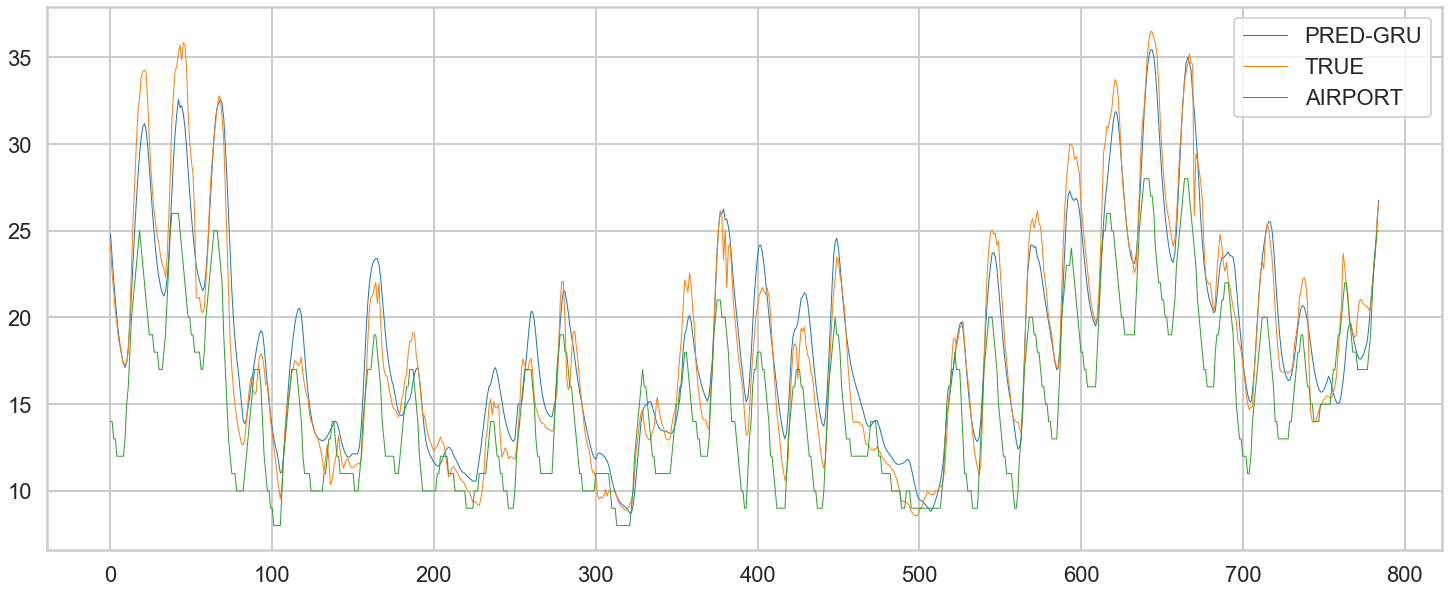

In [49]:
plt.figure(figsize=(25,10))
plt.plot(res, linewidth=1)
plt.plot(y_test, linewidth=1)
plt.plot(X_full[0:4044][-len(y_test):]['Temp'].values, linewidth=1)
plt.legend(['PRED-GRU', 'TRUE', 'AIRPORT'], loc='upper right')

In [90]:
y_test

array([array([24.2775]), array([22.52333333]), array([21.50083333]),
       array([20.35416667]), array([19.58083333]), array([18.73333333]),
       array([18.30083333]), array([17.74833333]), array([17.26]),
       array([17.3325]), array([17.41]), array([18.03416667]),
       array([20.0725]), array([22.93833333]), array([25.7675]),
       array([27.7975]), array([30.0175]), array([31.82833333]),
       array([32.64666667]), array([33.87]), array([34.15583333]),
       array([34.26166667]), array([34.155]), array([32.49666667]),
       array([30.26166667]), array([28.5225]), array([27.185]),
       array([26.11]), array([25.3325]), array([24.64166667]),
       array([24.20416667]), array([23.51333333]), array([23.05833333]),
       array([22.82]), array([22.3275]), array([23.5075]),
       array([25.67666667]), array([28.25583333]), array([31.48333333]),
       array([32.9325]), array([34.20583333]), array([34.49083333]),
       array([35.22916667]), array([35.71166667]), array([34.8

In [51]:
from sklearn.metrics import mean_squared_error

print ("MSE ERROR")
print ('GRU:',mean_squared_error(y_test, res))
print ('AIRPORT:',mean_squared_error(y_test, X_full[0:4044][-len(y_test):]['Temp'].values))
print ('PERCENT GAINED FROM GRU:', mean_squared_error(y_test, X_full[0:4044][-len(y_test):]['Temp'].values)/mean_squared_error(y_test, res) * 100, '%')

MSE ERROR
GRU: 2.9625084363183514
AIRPORT: 19.662800841295113
PERCENT GAINED FROM GRU: 663.7213450683367 %


###### SIMPLE NEURAL NETWORK

In [44]:
K.clear_session()

In [45]:
mcp_save = ModelCheckpoint(filepath='./nnbest.h5', save_best_only=True, monitor='val_loss', mode='min')

In [46]:
X_train, X_test_nn, y_train, y_test_nn = train_test_split(
X, y, test_size=0.2, random_state=42, shuffle=False)
x_scaler = MinMaxScaler()
x_scaler.fit(X_full)
x_train_scaled = x_scaler.transform(X_train)
x_test_scaled = x_scaler.transform(X_test_nn)
x_full_pred_scaled = x_scaler.transform(X_full)

In [47]:
linear_model = createModel()


In [48]:
history = linear_model.fit(x_train_scaled, 
                 y_train, 
                 batch_size=32, 
                 epochs=300, 
                 shuffle=False, 
                 verbose=1, 
                 validation_data=(X_test_nn, y_test_nn),
                 callbacks=[mcp_save])

Train on 3235 samples, validate on 809 samples
Epoch 1/300
3235/3235 [==============================] - 0s 75us/step - loss: 76.5947 - val_loss: 308.2326
Epoch 2/300
3235/3235 [==============================] - 0s 27us/step - loss: 62.3421 - val_loss: 273.8463
Epoch 3/300
3235/3235 [==============================] - 0s 25us/step - loss: 58.4032 - val_loss: 254.4069
Epoch 4/300
3235/3235 [==============================] - 0s 23us/step - loss: 56.7600 - val_loss: 241.1687
Epoch 5/300
3235/3235 [==============================] - 0s 23us/step - loss: 55.7574 - val_loss: 230.9760
Epoch 6/300
3235/3235 [==============================] - 0s 23us/step - loss: 54.1481 - val_loss: 220.9113
Epoch 7/300
3235/3235 [==============================] - 0s 24us/step - loss: 48.9602 - val_loss: 234.6177
Epoch 8/300
3235/3235 [==============================] - 0s 22us/step - loss: 41.1871 - val_loss: 319.5690
Epoch 9/300
3235/3235 [==============================] - 0s 24us/step - loss: 34.7065 - val_loss:

OSError: Unable to create file (unable to open file: name = './nnbest.h5', errno = 22, error message = 'Invalid argument', flags = 13, o_flags = 302)

In [49]:
nn_model = createModel()
nn_model.load_weights("./nnbest.h5")

In [50]:
pred = nn_model.predict(X_test_nn)

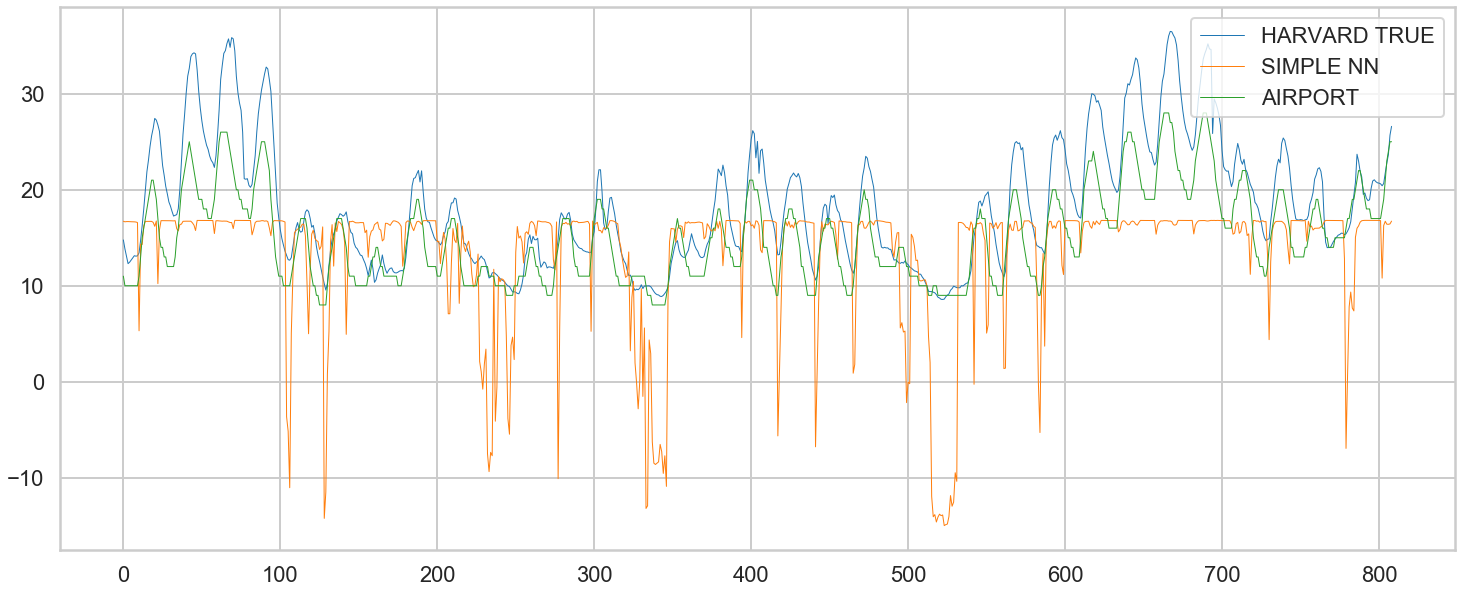

In [51]:
plt.figure(figsize=(25,10))
plt.plot(y_test_nn.values, linewidth=1)
plt.plot(pred, linewidth=1)
plt.plot(X_full[0:4044][-len(y_test_nn):]['Temp'].values, linewidth=1)
plt.legend(['HARVARD TRUE', 'SIMPLE NN', 'AIRPORT'], loc='upper right')

In [52]:
from sklearn.metrics import mean_squared_error

print ("MSE ERROR")
print ('NN:',mean_squared_error(y_test_nn, pred))
print ('AIRPORT:',mean_squared_error(y_test_nn, X_full[0:4044][-len(y_test_nn):]['Temp'].values))


MSE ERROR
NN: 72.80524831550025
AIRPORT: 19.77411904357231


###### FULL PREDICTION MPDEL

In [54]:
###### prediction model
from IPython.display import clear_output

# print ("PREDICTING...")
newX_1_pred = y.values
newX_1_pred = np.array(newX_1_pred[-look_back:]).flatten()
newX_2_pred = X_full[4044:]

newX_1_pred_scaled = x_scaler_1.transform([newX_1_pred])
newX_2_pred_scaled = x_scaler_2.transform(newX_2_pred)

res = []
for i in range(len(newX_2_pred_scaled)): 
    if i % 100 == 0:
        clear_output()
        print (i * 100.0 / len(newX_2_pred_scaled), '%')
    pred = lstm_model.predict([newX_1_pred_scaled.reshape(1,120,1) ,newX_2_pred_scaled[i].reshape(1,9)])
    res.append(pred[0][0])
    newX_1_pred = np.delete(newX_1_pred, 0)
    newX_1_pred = np.append(newX_1_pred, pred[0][0])
    newX_1_pred_scaled = x_scaler_1.transform([newX_1_pred])
    newX_2_pred_scaled = x_scaler_2.transform(newX_2_pred)

0.0 %


InvalidArgumentError: Tensor input_7:0, specified in either feed_devices or fetch_devices was not found in the Graph

In [55]:
print (len(res))
import pickle
pickle.dump( res, open( "BiLSTM.p", "wb" ) )

0


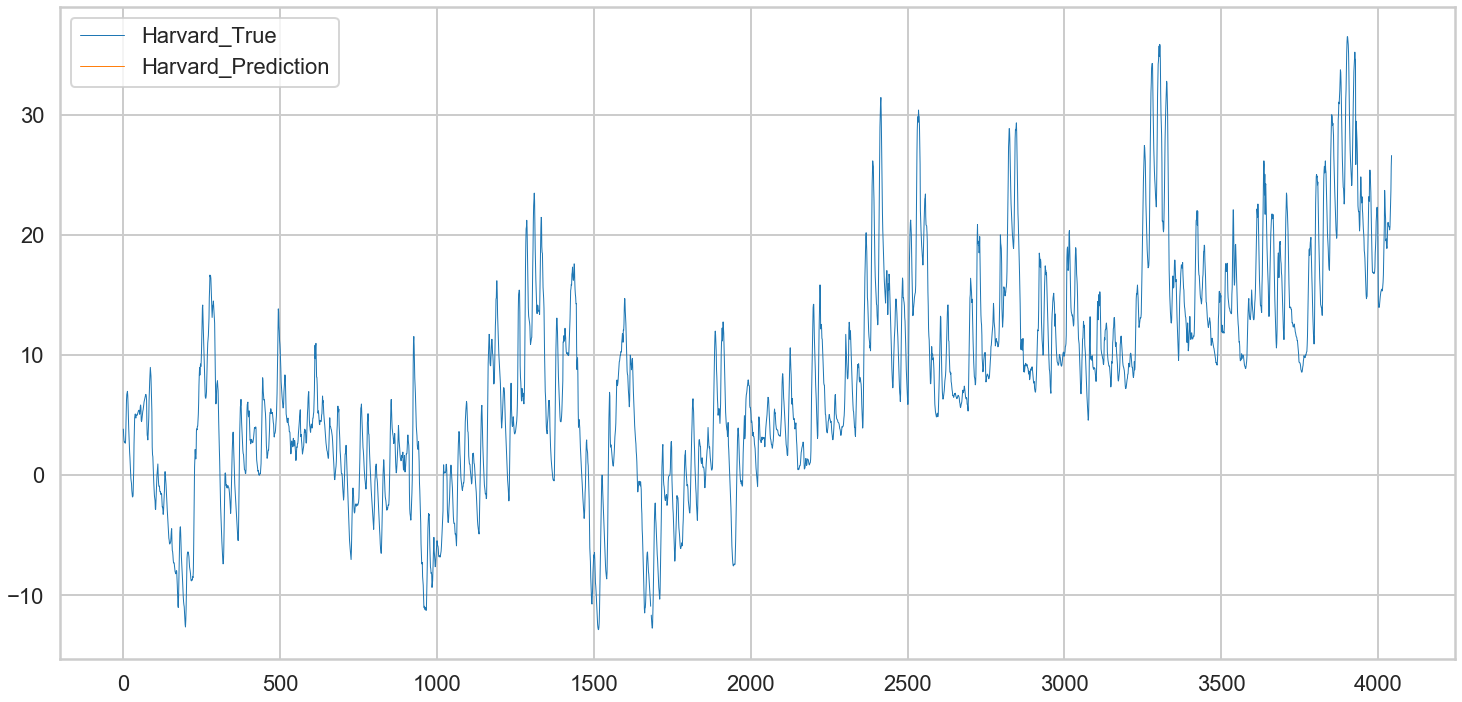

In [56]:
index = np.arange(4044,len(airport))
pred_df = pd.DataFrame(data=res, index=index, columns=["Temp"])
plt.figure(figsize=(25,12))
# plt.plot(airport[['Temp']], linewidth=1)
plt.plot(harvard[['Temp']], linewidth=1)
plt.plot(pred_df[['Temp']], linewidth=1)
plt.legend(['Harvard_True', 'Harvard_Prediction'], loc='upper left')

In [57]:
linear_model = createModel()

In [58]:
linear_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test_nn, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, shuffle=False)

x_scaler = MinMaxScaler()
x_scaler.fit(X_full)
x_train_scaled = x_scaler.transform(X_train)
x_test_scaled = x_scaler.transform(X_test)
x_full_pred_scaled = x_scaler.transform(X_full)

ValueError: setting an array element with a sequence.

In [ ]:
history = linear_model.fit(x_train_scaled, 
                 y_train, 
                 batch_size=64, 
                 epochs=1200, 
                 shuffle=False, 
                 verbose=1, 
                 validation_data=(X_test, y_test),
                 callbacks=[mcp_save])

In [ ]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###### ORIGINAL DATA (AIRPORT VS HARVARD)

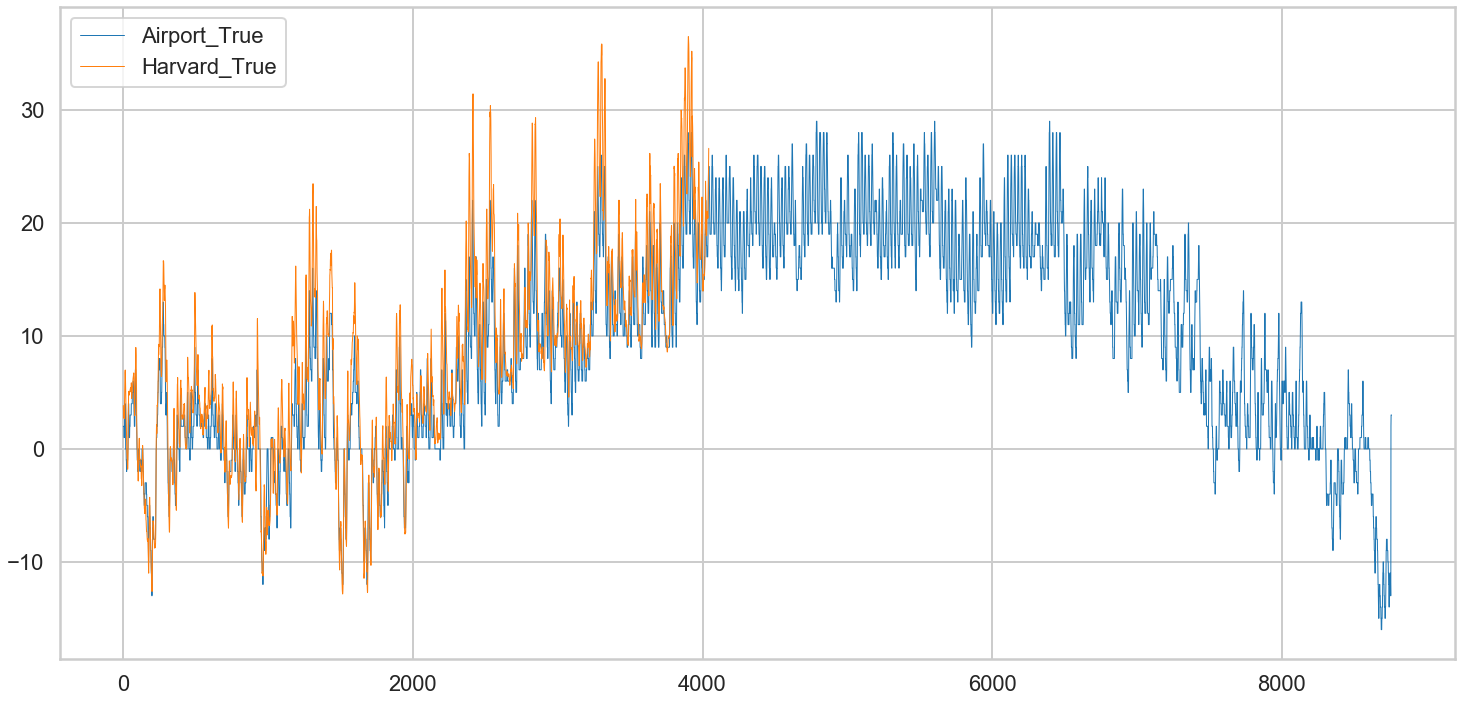

In [61]:
plt.figure(figsize=(25,12))
plt.plot(airport[['Temp']], linewidth=1)
plt.plot(harvard[['Temp']], linewidth=1)
plt.legend(['Airport_True', 'Harvard_True'], loc='upper left')


In [62]:
type(airport[['Temp']])

pandas.core.frame.DataFrame

In [64]:
# linear_model = createModel()
# linear_model.load_weights("./best.h5")


In [65]:
x_test = x_full_pred_scaled[4044:]
x_test_df = pd.DataFrame(data=x_test, index=np.arange(4044,len(airport)))

In [66]:
pred = linear_model.predict(x_test_df)
len(pred)

4716

In [67]:
index = np.arange(4044,len(airport))

In [68]:
pred_df = pd.DataFrame(data=pred, index=index, columns=["Temp"])

###### FINAL RESULT

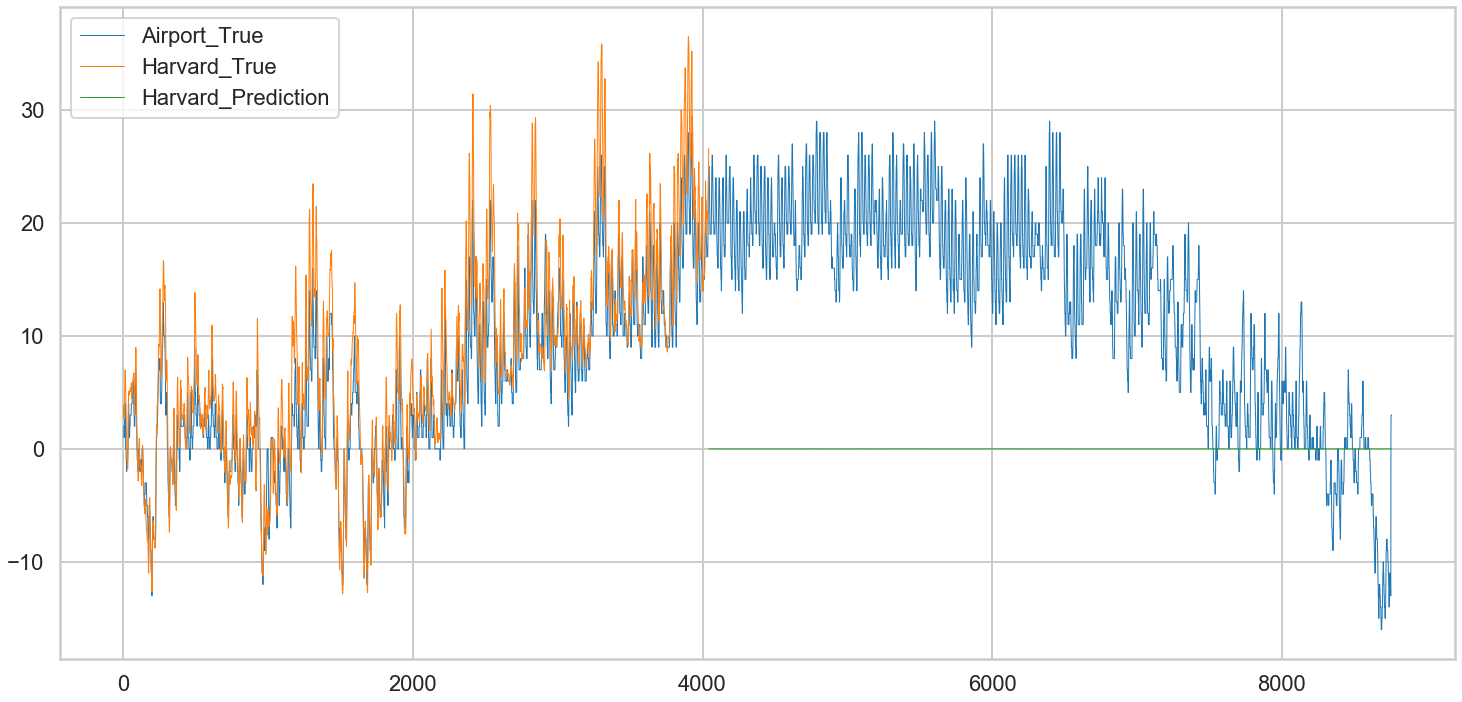

In [69]:
plt.figure(figsize=(25,12))
plt.plot(airport[['Temp']], linewidth=1)
plt.plot(harvard[['Temp']], linewidth=1)
plt.plot(pred_df[['Temp']], linewidth=1)
plt.legend(['Airport_True', 'Harvard_True', 'Harvard_Prediction'], loc='upper left')

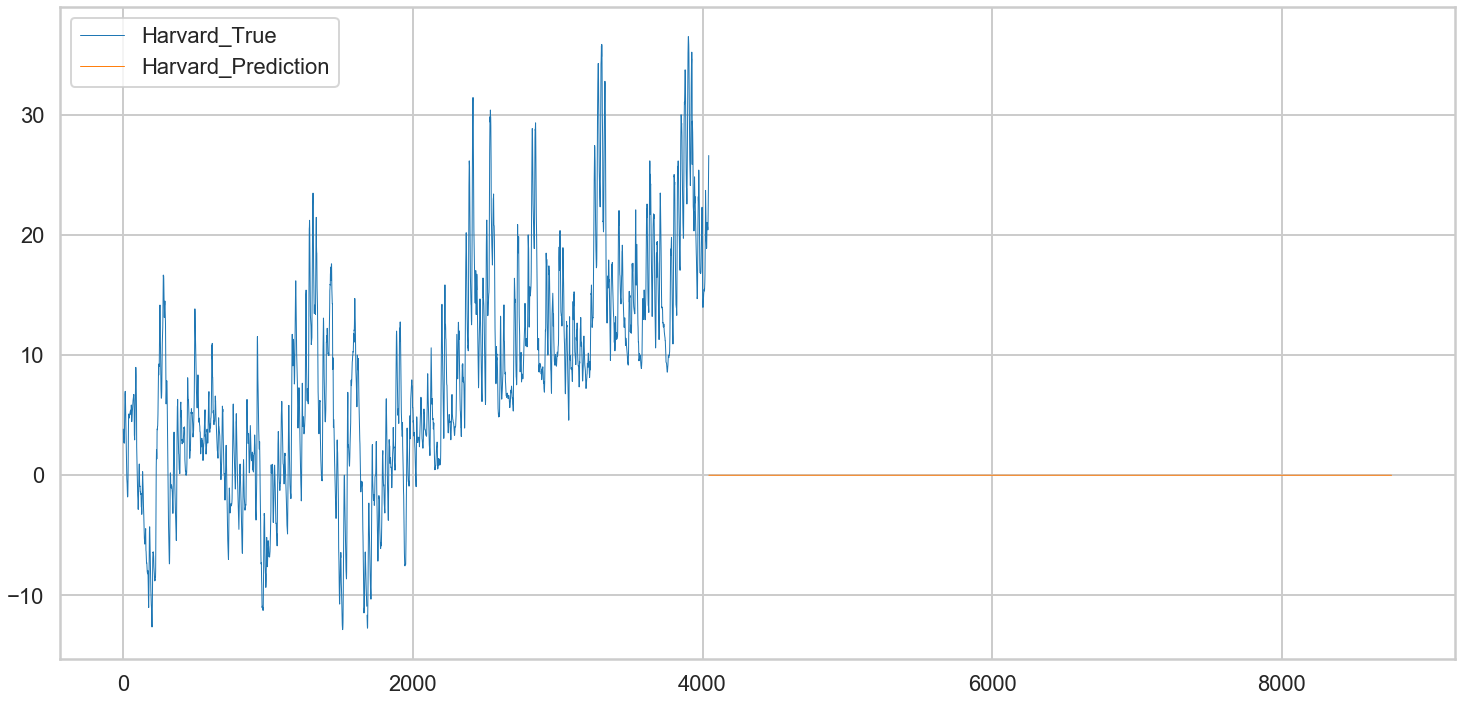

In [70]:
plt.figure(figsize=(25,12))
plt.plot(harvard[['Temp']], linewidth=1)
plt.plot(pred_df[['Temp']], linewidth=1)
plt.legend(['Harvard_True', 'Harvard_Prediction'], loc='upper left')

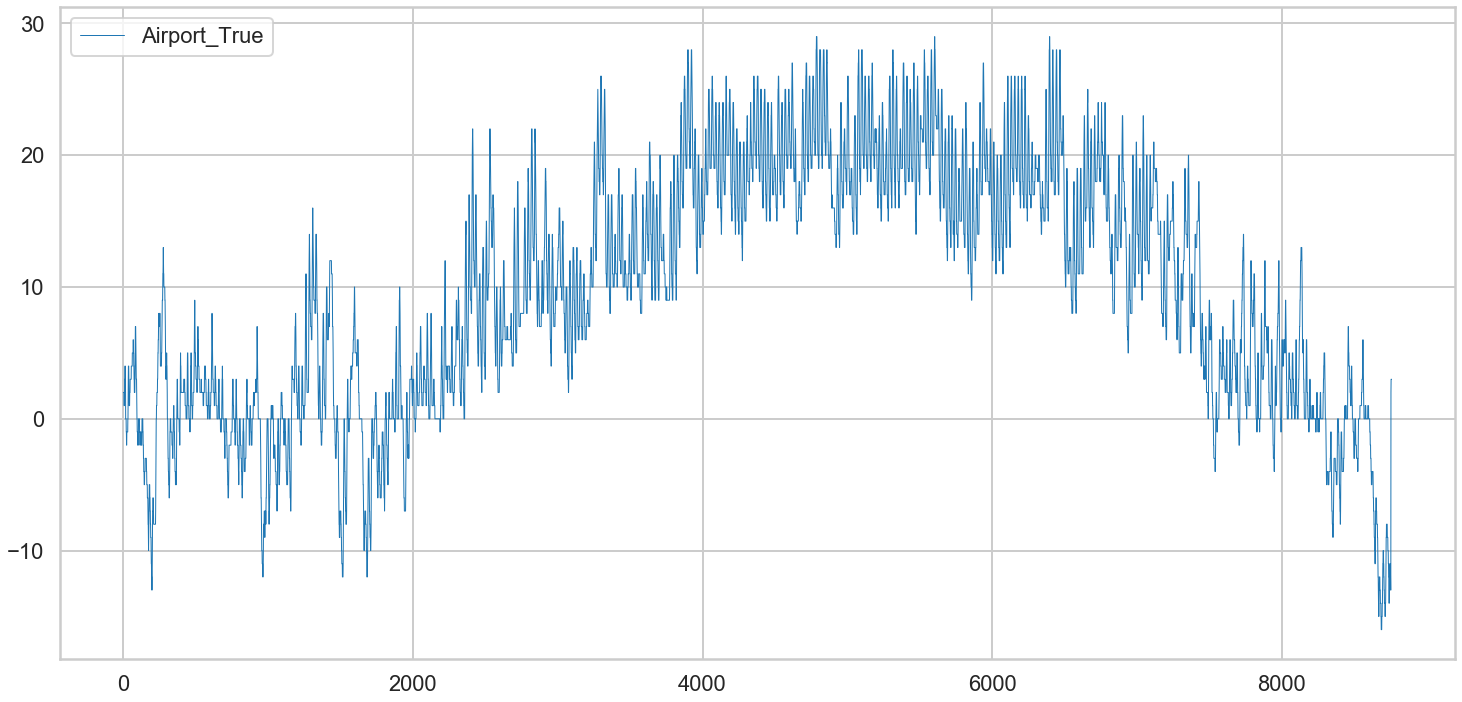

In [71]:
plt.figure(figsize=(25,12))
plt.plot(airport[['Temp']], linewidth=1)
plt.legend(['Airport_True'], loc='upper left')